<a href="https://colab.research.google.com/github/Gismer01/gismer_plp/blob/main/COVID_19_Global_Data_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 1. Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
print("Data loaded successfully!")

Data loaded successfully!


In [10]:
#2. Initial Data Exploration
# basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

Dataset shape: (429435, 67)

First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN



Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_

In [11]:
# 3. Data Cleaning
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

countries_of_interest = ['Kenya', 'United States', 'India', 'Brazil', 'United Kingdom',
                        'South Africa', 'Germany', 'China', 'Japan', 'Australia']

# Filter data for selected countries
df_filtered = df[df['location'].isin(countries_of_interest)].copy()

# key metrics to clean
key_metrics = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
               'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

# forward fill implementation using ffill()
df_filtered[key_metrics] = (df_filtered.groupby('location')[key_metrics]
                           .ffill())

# Fill NAs with 0
df_filtered[key_metrics] = df_filtered[key_metrics].fillna(0)

# additional metrics
df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']
df_filtered['cases_per_million'] = df_filtered['total_cases'] / (df_filtered['population'] / 1e6)
df_filtered['deaths_per_million'] = df_filtered['total_deaths'] / (df_filtered['population'] / 1e6)

# potential division by zero cases
df_filtered['death_rate'] = df_filtered['death_rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

# latest snapshot dataframe
latest_date = df_filtered['date'].max()
df_latest = df_filtered[df_filtered['date'] == latest_date]

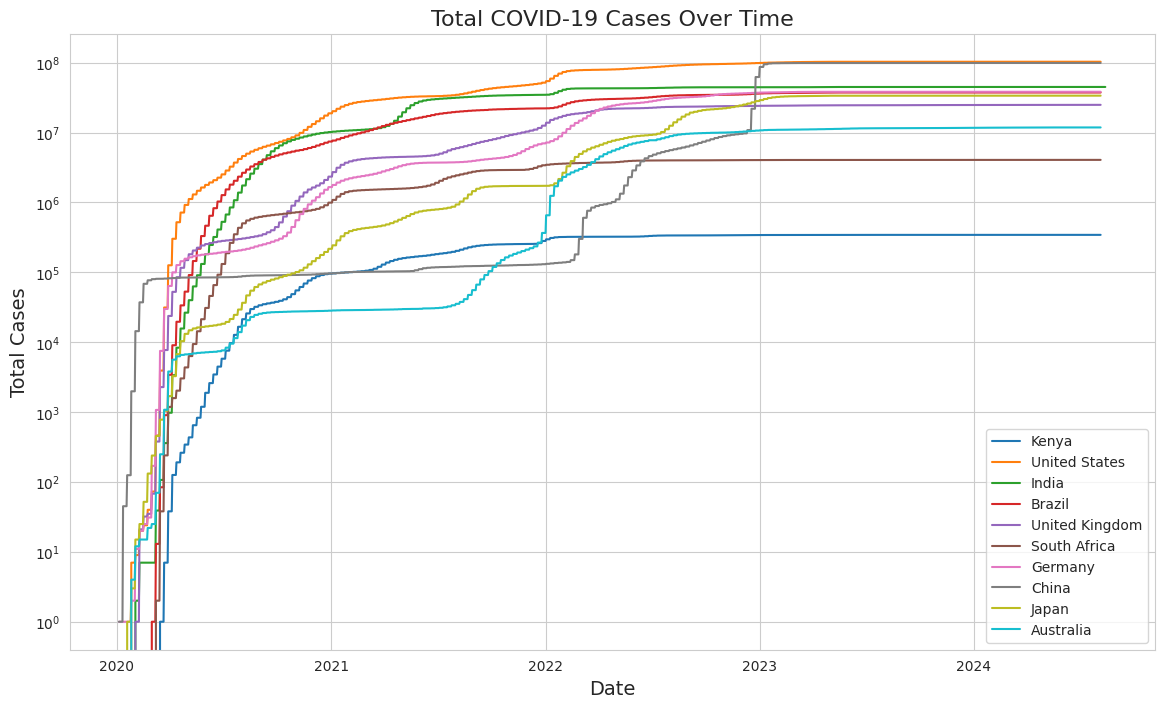

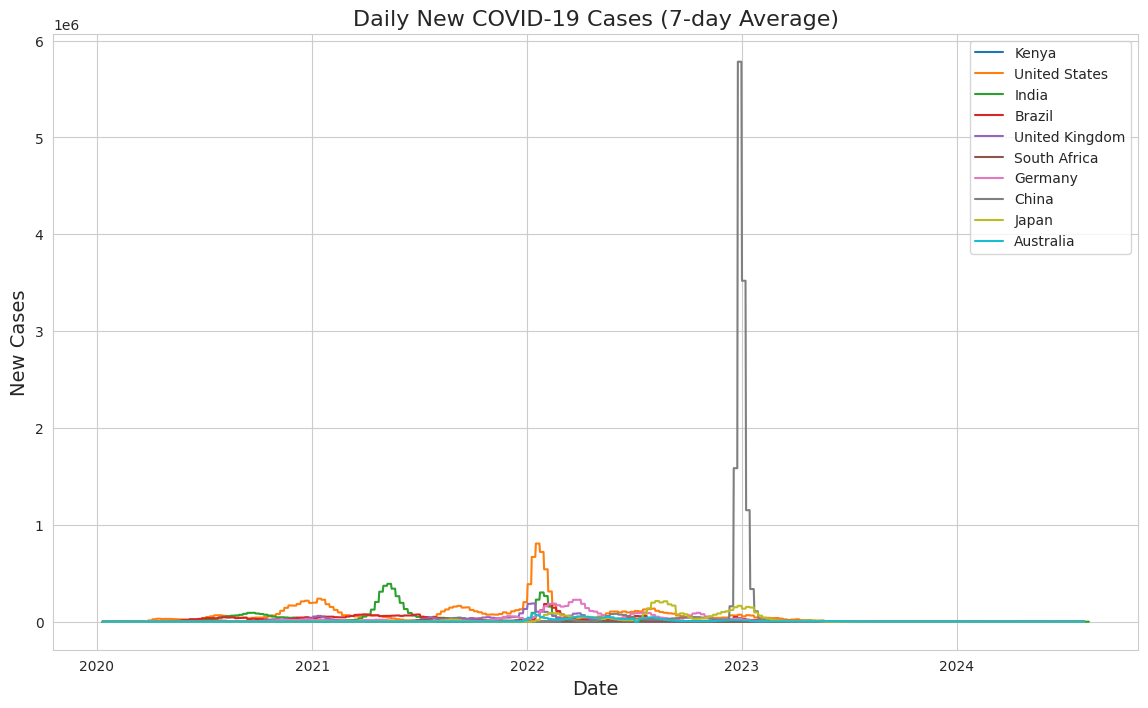

In [12]:
#4. Exploratory Data Analysis (EDA)
# Plot total cases over time for selected countries
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.legend()
plt.yscale('log')
plt.show()

# Plot new cases over time (7-day rolling average)
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'].rolling(7).mean(), label=country)

plt.title('Daily New COVID-19 Cases (7-day Average)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Cases', fontsize=14)
plt.legend()
plt.show()

<ipython-input-6-9d17eea37e69>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['vaccination_percentage'] = (country_data['people_fully_vaccinated'] / country_data['population']) * 100
<ipython-input-6-9d17eea37e69>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['vaccination_percentage'] = (country_data['people_fully_vaccinated'] / country_data['population']) * 100
<ipython-input-6-9d17eea37e69>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

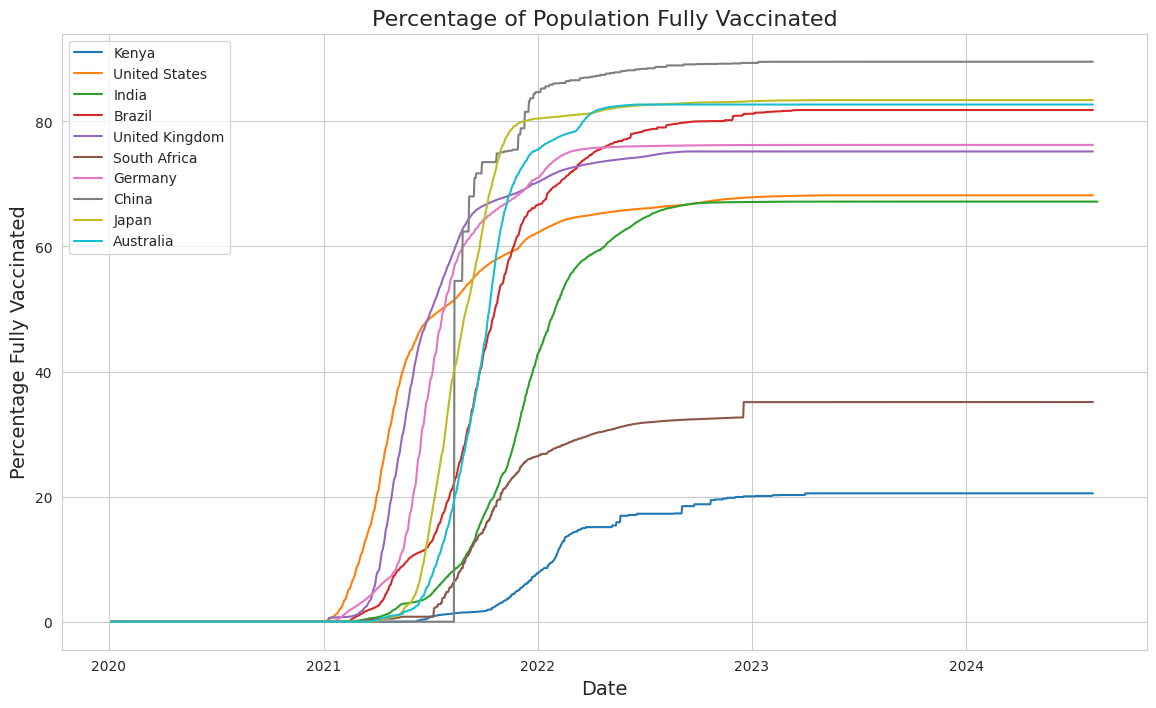

<ipython-input-6-9d17eea37e69>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_fully_vaccinated_per_hundred', y='location',


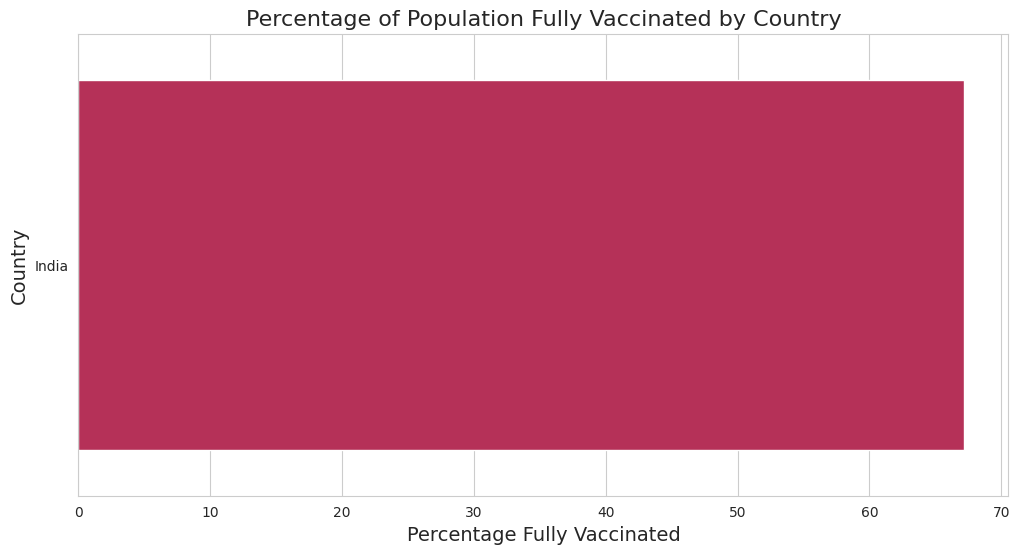

In [6]:
#5. Vaccination Analysis
# Plot vaccination progress
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
    country_data = df_filtered[df_filtered['location'] == country]
    # Calculate vaccination percentage
    country_data['vaccination_percentage'] = (country_data['people_fully_vaccinated'] / country_data['population']) * 100
    plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

plt.title('Percentage of Population Fully Vaccinated', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage Fully Vaccinated', fontsize=14)
plt.legend()
plt.show()

# Latest vaccination status
vaccination_comparison = df_latest.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location',
            data=vaccination_comparison, palette='rocket')
plt.title('Percentage of Population Fully Vaccinated by Country', fontsize=16)
plt.xlabel('Percentage Fully Vaccinated', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

In [13]:
# 6. Choropleth Map Visualization
# Create a world map of total cases per million
world_df = df[df['date'] == latest_date]  # latest data for all countries

fig = px.choropleth(world_df,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f'World COVID-19 Cases per Million People (as of {latest_date.strftime("%Y-%m-%d")})',
                    range_color=(0, 200000))

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

# world map of vaccination rates
fig = px.choropleth(world_df,
                    locations="iso_code",
                    color="people_fully_vaccinated_per_hundred",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title=f'Percentage of Population Fully Vaccinated (as of {latest_date.strftime("%Y-%m-%d")})',
                    range_color=(0, 100))

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()